<a href="https://colab.research.google.com/github/maxmarkov/tabular_data_competitions/blob/master/jleague_nishika/nishika_jleague_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nishika. J League. Part I: Data cleaning and feature engineering

From the data, you will build a machine learning model to predict the 2019 game time for each player. 

[Competition Link](https://www.nishika.com/competitions/6/summary)

## 1. Load libraries

In [1]:
!pip3 install fastai2==0.0.30 --quiet
!pip3 install fastcore==1.0.0 --quiet
!pip3 install pykakasi --quiet

     |████████████████████████████████| 184kB 2.7MB/s 
     |████████████████████████████████| 40kB 3.1MB/s 
     |████████████████████████████████| 2.4MB 2.9MB/s 
     |████████████████████████████████| 184kB 16.7MB/s 
     |████████████████████████████████| 133kB 21.9MB/s 


In [2]:
import pandas as pd
import numpy as np
import pykakasi
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date
import datetime

In [3]:
import fastai2
print(f"fastai version {fastai2.__version__}")

from fastai2.tabular.all import *

fastai version 0.0.30


## 2. Load data

Data is stored in my repo

In [4]:
!git clone https://github.com/maxmarkov/tabular_data_competitions.git

Cloning into 'tabular_data_competitions'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 24 (delta 2), reused 24 (delta 2), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [5]:
FOLDER='tabular_data_competitions/jleague_nishika/data'

# main data
train_2016 = pd.read_csv(FOLDER+'/train_2016.csv')
train_2017 = pd.read_csv(FOLDER+'/train_2017.csv')
train_2018 = pd.read_csv(FOLDER+'/train_2018.csv')
test_2019 = pd.read_csv(FOLDER+'/test.csv')

# extra information
team = pd.read_csv(FOLDER+'/team.csv')
coach = pd.read_csv(FOLDER+'/coach.csv')
player = pd.read_csv(FOLDER+'/player_sameornot.csv')

# sample subsmission 
sample = pd.read_csv(FOLDER+'/sample_submission.csv')

# column names as a list
columns = list(train_2016.columns)

# how much data we have
print('2016: ', len(train_2016))
print('2017: ', len(train_2017))
print('2018: ', len(train_2018))
print('test: ', len(test_2019))

2016:  477
2017:  473
2018:  464
test:  488


## 3. Derive Age from birthdate

In [6]:
# 2016: J-league start: 27/02/2016
start_2016 = date(year=2016, month=2, day=27)
# 2017: J-league start: 25/02/2017
start_2017 = date(year=2017, month=2, day=25)
# 2018: J-league start: 23/02/2018
start_2018 = date(year=2018, month=2, day=23)
# 2019: J-league start: 22/02/2019
start_2019 = date(year=2019, month=2, day=22)

#train_2016['birthdate'][0]
#datetime.datetime.strptime(train_2016['birthdate'][0], '%Y-%m-%d').date()-start_2016
def add_age(df, year):
    df["birthdate"]= df["birthdate"].str.split("-", n = 1, expand = True)
    df["birthdate"]= pd.to_numeric(df["birthdate"])
    df['age'] = year - df["birthdate"]
    #df["birthdate"] = pd.to_datetime(df["birthdate"], yearfirst=True)
    #print(df['birthdate'])
    #print(df)
add_age(train_2016, 2016)
add_age(train_2017, 2017)
add_age(train_2018, 2018)
add_age(test_2019, 2019)

## 4. New feature: place in the last year competition.

In [7]:
def team_name(teams):
    kks = pykakasi.kakasi()
    table = {}
    for team in teams:
        name = []
        for i in range(len(kks.convert(team))):
            name.append(kks.convert(team)[i]['passport'])
        table[team] = max(name, key=len)
    return(table)

teams_2016 = list(train_2016['team'].unique())
teams_2017 = list(train_2017['team'].unique())
teams_2018 = list(train_2018['team'].unique())
teams_2019 = list(test_2019['team'].unique())

teams_2016_latin = team_name(teams_2016)
teams_2017_latin = team_name(teams_2017)
teams_2018_latin = team_name(teams_2018)
teams_2019_latin = team_name(teams_2019)

In [8]:
team_position = pd.read_csv(FOLDER+'/team_performance_season_before.csv',names=['team_jp', 'team_eng', 'season_2015', 'season_2016', 'season_2017', 'season_2018'], dtype={'season_2015': int, 'season_2016': int,
                                                                                                       'season_2017': int, 'season_2018': int})
for t_2016 in teams_2016:                                                                                                                                                    
  train_2016.loc[train_2016['team'] == t_2016, 'place_prev_season'] = team_position[team_position['team_jp']==t_2016]['season_2015'].values[0]
for t_2017 in teams_2017:                                                                                                                                                    
  train_2017.loc[train_2017['team'] == t_2017, 'place_prev_season'] = team_position[team_position['team_jp']==t_2017]['season_2016'].values[0]
for t_2018 in teams_2018:                                                                                                                                                    
  train_2018.loc[train_2018['team'] == t_2018, 'place_prev_season'] = team_position[team_position['team_jp']==t_2018]['season_2017'].values[0]
for t_2019 in teams_2019:                                                                                                                                                    
  test_2019.loc[test_2019['team'] == t_2019, 'place_prev_season'] = team_position[team_position['team_jp']==t_2019]['season_2018'].values[0]

test_2019.head(5)

,id,team,No,name,position,birthdate,height,weight,salary,nth_year,is_youth,nationality,j1_total_num_played,j1_total_scores,j2_total_num_played,j2_total_scores,j3_total_num_played,j3_total_scores,na_total_num_played,na_total_scores,prev3_team,prev2_team,prev1_team,prev3_div,prev2_div,prev1_div,prev3_num_played,prev2_num_played,prev1_num_played,prev3_scores,prev2_scores,prev1_scores,prev3_time_played,prev2_time_played,prev1_time_played,age,place_prev_season
0,0,C大阪,1.0,圍 謙太朗,GK,1991,190.0,90.0,750,2.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,FC東京,C大阪,福岡,1,1,2,0,0,26,0,0,0,0,0,2340,28,3.0
1,1,C大阪,2.0,松田 陸,DF,1991,171.0,69.0,2700,4.0,NaN,NaN,76.0,3.0,42.0,2.0,NaN,NaN,NaN,NaN,C大阪,C大阪,C大阪,2,1,1,42,31,29,2,2,0,3733,2662,2524,28,3.0
2,2,C大阪,3.0,木本 恭生,DF,1993,183.0,73.0,2000,4.0,NaN,NaN,45.0,2.0,1.0,1.0,23.0,1.0,NaN,NaN,C大阪,C大阪,C大阪,2,1,1,1,23,22,1,2,0,25,1296,1651,26,3.0
3,3,C大阪,4.0,藤本 康太,DF,1986,177.0,76.0,2400,15.0,NaN,NaN,140.0,7.0,76.0,6.0,3.0,NaN,NaN,NaN,C大阪,C大阪,C大阪,2,1,1,17,3,3,0,0,0,1039,13,178,33,3.0
4,4,C大阪,5.0,藤田 直之,MF,1987,175.0,72.0,4200,1.0,NaN,NaN,209.0,12.0,55.0,4.0,NaN,NaN,1.0,NaN,神戸,神戸,神戸,1,1,1,32,21,29,0,1,2,2299,1845,2456,32,3.0


## 5. Train data preparation.

Ugly way to clean data and to engineer some features.

In [9]:
def prepare_data(df):
  '''
  Function to clean data, change it's type and engineer some features
  '''
  df.drop(columns=['id', 'name', 'birthdate', 'team', 'is_youth'], inplace=True)

  # if player is U-21, then he is young; old is_youth data had no meaning.
  df.loc[train.age <= 21, 'is_youth'] = True
  df.loc[train.age > 21, 'is_youth'] = False

  # if player if O-31, then he is old.
  df.loc[train.age > 31, 'is_old'] = True
  df.loc[train.age <= 31, 'is_old'] = False

  #nationality: nan==Japan, Brazil, Korea and other
  df['salary'].fillna(value='japan', inplace=True)
  df.loc[train.nationality =='koera', 'nationality'] = 'korea'
  df.loc[~train['nationality'].isin(['japan','korea', 'brazil']), 'nationality'] = 'other'

  # some salaries are not known: change them to mean value
  min_salary = df[df['salary'] != '-']['salary'].min()
  df.loc[df.salary =='-', 'salary'] = min_salary
  df['salary'] = df['salary'].astype('float')

  ######################## J1, J2, J3, NA num_played and scores ########################################
  # nan means never played in the league or in the mational team
  df['j1_total_num_played'].fillna(value=0, inplace=True)
  df['j2_total_num_played'].fillna(value=0, inplace=True)
  df['j3_total_num_played'].fillna(value=0, inplace=True)
  df['na_total_num_played'].fillna(value=0, inplace=True)

  df['j1_total_scores'].fillna(value=0, inplace=True)
  df['j2_total_scores'].fillna(value=0, inplace=True)
  df['j3_total_scores'].fillna(value=0, inplace=True)
  df['na_total_scores'].fillna(value=0, inplace=True)

  # extra features: sum up games for j1, j2 and national teams
  df['j12_total_num_played'] = df['j1_total_num_played'] + 0.5*df['j2_total_num_played']
  df['j1na_total_num_played'] = df['j1_total_num_played'] + df['na_total_num_played']

  df['j12_total_scores'] = df['j1_total_scores'] + 0.5*df['j2_total_num_played']
  df['j1na_total_scores'] = df['j1_total_scores'] + df['na_total_scores']  
  ####################################################################################################

  ######################## prev_num_played and prev_scores ###########################################
  df.loc[df['prev1_num_played'] =='-', 'prev1_num_played'] = '0'
  df.loc[df['prev2_num_played'] =='-', 'prev2_num_played'] = '0'
  df.loc[df['prev3_num_played'] =='-', 'prev3_num_played'] = '0'
  #change type to int
  df['prev1_num_played'] = df['prev1_num_played'].astype('int')
  df['prev2_num_played'] = df['prev2_num_played'].astype('int')
  df['prev3_num_played'] = df['prev3_num_played'].astype('int')
  # new feature sum for 2 and 3 seasons
  df['prev12_num_played'] = df['prev1_num_played'] + df['prev2_num_played']
  df['prev123_num_played'] = df['prev1_num_played'] + df['prev2_num_played'] + df['prev3_num_played']

  df.loc[df['prev1_scores'] =='-', 'prev1_scores'] = '0'
  df.loc[df['prev2_scores'] =='-', 'prev2_scores'] = '0'
  df.loc[df['prev3_scores'] =='-', 'prev3_scores'] = '0'
  #change type to int
  df['prev1_scores'] = df['prev1_scores'].astype('int')
  df['prev2_scores'] = df['prev2_scores'].astype('int')
  df['prev3_scores'] = df['prev3_scores'].astype('int')
  # new feature sum for 2 and 3 seasons
  df['prev12_scores'] = df['prev1_scores'] + df['prev2_scores']
  df['prev123_scores'] = df['prev1_scores'] + df['prev2_scores'] + df['prev3_scores']
  #####################################################################################################

  ########################        prev_time_played           ##########################################
  df.loc[df['prev1_time_played'] =='-', 'prev1_time_played'] = '0'
  df.loc[df['prev2_time_played'] =='-', 'prev2_time_played'] = '0'
  df.loc[df['prev3_time_played'] =='-', 'prev3_time_played'] = '0'
  #change type to int
  df['prev1_time_played'] = df['prev1_time_played'].astype('float')
  df['prev2_time_played'] = df['prev2_time_played'].astype('float')
  df['prev3_time_played'] = df['prev3_time_played'].astype('float')
  # new feature sum for 2 and 3 seasons
  df['prev12_time_played'] = df['prev1_time_played'] + df['prev2_time_played']
  df['prev123_time_played'] = df['prev1_time_played'] + df['prev2_time_played'] + df['prev3_time_played']
  #####################################################################################################

  ########################              prev_div             ##########################################
  df.loc[train['prev1_div'] !='1', 'prev1_div'] = False
  df.loc[train['prev1_div'] =='1', 'prev1_div'] = True
  df.loc[train['prev2_div'] !='1', 'prev2_div'] = False
  df.loc[train['prev2_div'] =='1', 'prev2_div'] = True
  df.loc[train['prev3_div'] !='1', 'prev3_div'] = False
  df.loc[train['prev3_div'] =='1', 'prev3_div'] = True
  # new feature sum for 2 and 3 seasons
  df['prev12_div'] = df['prev1_div'] + df['prev2_div']
  df['prev123_div'] = df['prev1_div'] + df['prev2_div'] + df['prev3_div']
  #####################################################################################################

  ########################              same team feature    ##########################################
  # drop for the moment
  df.drop(columns=['prev1_team', 'prev2_team', 'prev3_team'], inplace=True)
  #####################################################################################################
  return(df)

train = pd.concat([train_2016, train_2017, train_2018], ignore_index=True)
train_new = prepare_data(train) 
test_new = prepare_data(test_2019)

train_new.head(5)

,No,time_played,position,height,weight,salary,nth_year,nationality,j1_total_num_played,j1_total_scores,j2_total_num_played,j2_total_scores,j3_total_num_played,j3_total_scores,na_total_num_played,na_total_scores,prev3_div,prev2_div,prev1_div,prev3_num_played,prev2_num_played,prev1_num_played,prev3_scores,prev2_scores,prev1_scores,prev3_time_played,prev2_time_played,prev1_time_played,age,place_prev_season,is_youth,is_old,j12_total_num_played,j1na_total_num_played,j12_total_scores,j1na_total_scores,prev12_num_played,prev123_num_played,prev12_scores,prev123_scores,prev12_time_played,prev123_time_played,prev12_div,prev123_div
0,2.0,2533.0,DF,180.0,76.0,5000.0,11.0,other,305.0,4.0,37.0,3.0,0.0,0.0,9.0,0.0,True,True,True,34,34,34,1,0,0,3060.0,2992.0,2917.0,33,4.0,False,True,323.5,314.0,22.5,4.0,68,102,0,1,5909.0,8969.0,2,3
1,3.0,2865.0,DF,183.0,79.0,6000.0,7.0,other,234.0,19.0,37.0,6.0,0.0,0.0,29.0,2.0,True,True,True,33,33,32,1,1,7,2970.0,2970.0,2834.0,29,4.0,False,False,252.5,263.0,37.5,21.0,65,98,8,9,5804.0,8774.0,2,3
2,4.0,1087.0,MF,184.0,75.0,2800.0,7.0,other,129.0,10.0,32.0,4.0,0.0,0.0,7.0,0.0,True,True,True,32,32,29,2,3,4,2618.0,2819.0,2052.0,29,4.0,False,False,145.0,136.0,26.0,10.0,61,93,7,9,4871.0,7489.0,2,3
3,5.0,2925.0,DF,182.0,75.0,1500.0,4.0,other,23.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,True,False,True,0,41,20,0,2,0,0.0,3689.0,1454.0,27,4.0,False,False,43.5,23.0,20.5,0.0,61,61,2,2,5143.0,5143.0,1,2
4,6.0,1080.0,DF,176.0,70.0,380.0,1.0,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,0,0,0,0,0,0,0.0,0.0,0.0,22,4.0,False,False,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,1,1


## 6. Save data into csv files

In [10]:
from google.colab import files
train_new.to_csv('nishika_train.csv', header=True)
test_new.to_csv('nishika_test.csv', header=True)

files.download('nishika_train.csv')
files.download('nishika_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Supp1. Stats to decide what to do with certain columns

1. Percentage of players who played in J3 
  - 11.3% in 2016 (423=NaN, 0=0)
  - 18.8% in 2017 (384=NaN, 1=0)
  - 18.9% in 2018 (376=NaN, 3=0), goals (376=NaN,56=0)
  - 22.9% in 2019 (378=NaN, 0=0), goals (430=NaN,1=0)

2. Percentage of players who played in J2
  - 59.9% in 2016 (191=NaN, 11=0)
  - 61.2% in 2017 (184=NaN, 11=0)
  - 62.9% in 2018 (172=NaN, 9=0), goals (172=NaN,76=0)
  - 54.7% in 2019 (221=NaN, 0=0), goals (285=NaN,2=0)

3. Percentage of players who played in J1
  - 88.1% in 2016 (57=NaN, 40=0)
  - 87.8% in 2017 (57=NaN, 32=0)
  - 89.2% in 2018 (50=NaN, 35=0), goals (50=NaN,127=0)
  - 79.9% in 2019 (98=NaN, 0=0), goals (184=NaN,21=0)

4. Percentage of players who played in National Team
  - 19.7% in 2016 (383=NaN, 5=0)
  - 21.1% in 2017 (373=NaN, 8=0)
  - 27.1% in 2018 (338=NaN, 7=0), goals (338=NaN,73=0)
  - 22.3% in 2019 (379=NaN, 0=0), goals (441=NaN,1=0)
   

## Supp 2. Plot some distributions

In [11]:
def plot_feature_per_season(fname, xname):
  '''
  function to visualize feature distribution per season
  '''
  seasons = ['2016','2017','2018','2019']
  fig, axs = plt.subplots(ncols=4,nrows=1, figsize=(20,4.5), sharex=True, sharey=True)
  
  train_2016.hist(fname, bins=20, ax=axs[0])
  train_2017.hist(fname, bins=20, ax=axs[1])
  train_2018.hist(fname, bins=20, ax=axs[2])
  test_2019.hist(fname, bins=20, ax=axs[3])

  fig.suptitle(fname + ' feature', fontsize=24)
  fig.subplots_adjust(top=0.82)

  for i in range(4):
    axs[i].set_xlabel(xname, fontsize=15)
    axs[i].set_ylabel('Number of players', fontsize=15)
    axs[i].set_title('Season '+seasons[i], fontsize=24)

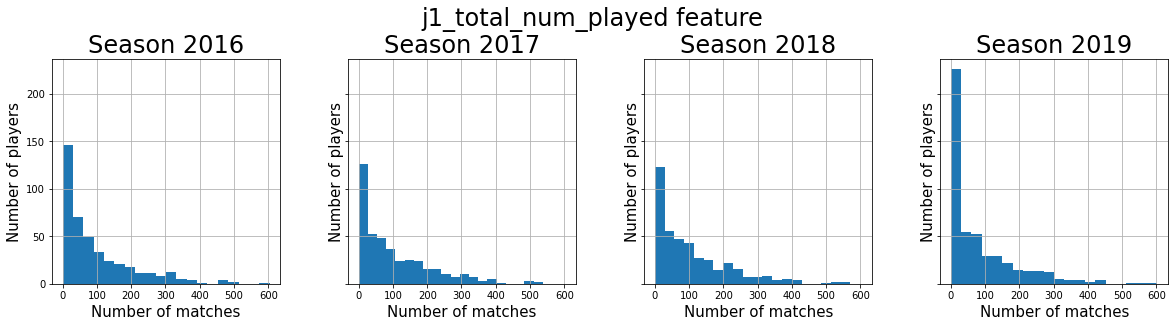

In [12]:
plot_feature_per_season(fname='j1_total_num_played', xname='Number of matches')

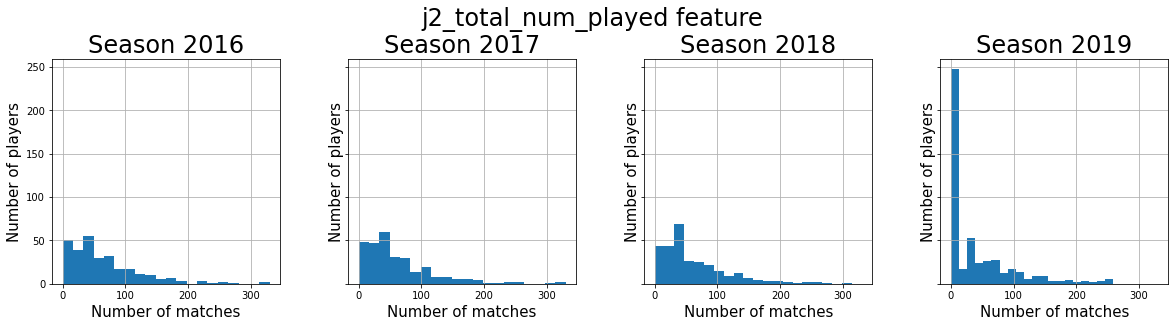

In [13]:
plot_feature_per_season(fname='j2_total_num_played', xname='Number of matches')

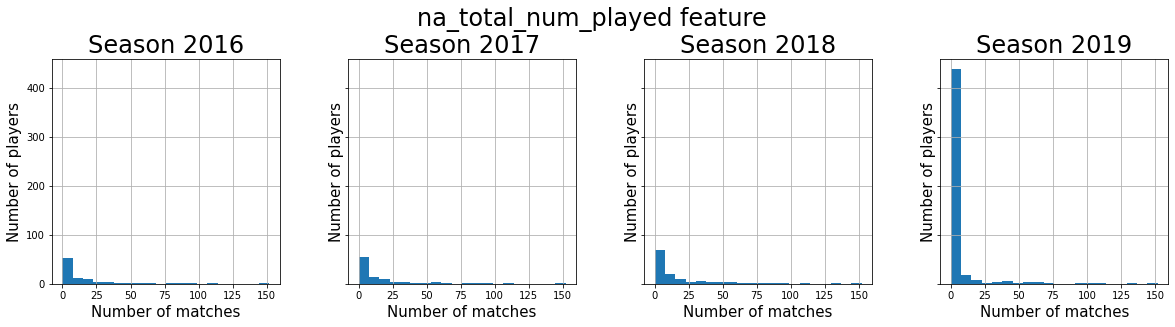

In [14]:
plot_feature_per_season(fname='na_total_num_played', xname='Number of matches')

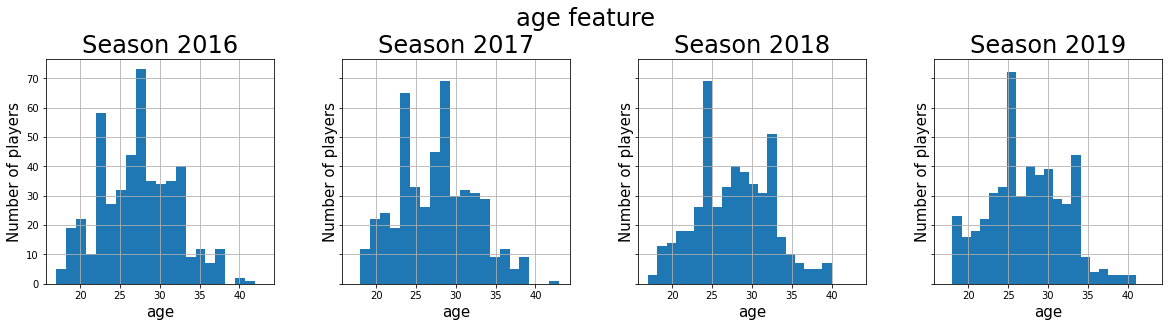

In [15]:
plot_feature_per_season(fname='age', xname='age')

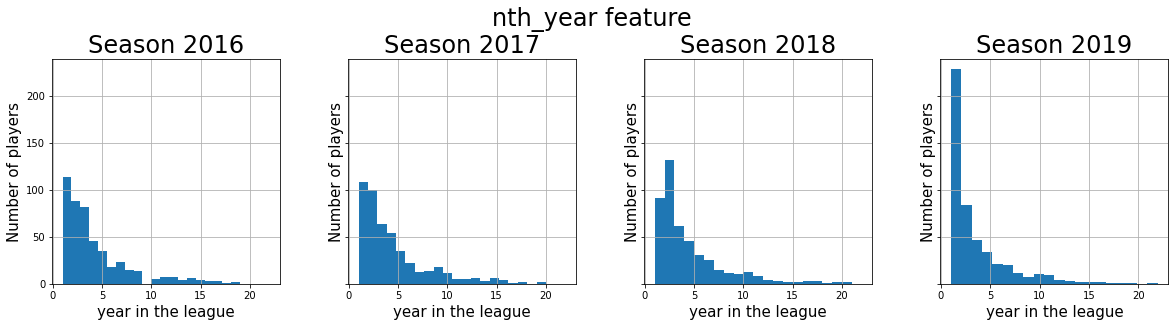

In [16]:
plot_feature_per_season(fname='nth_year', xname='year in the league')

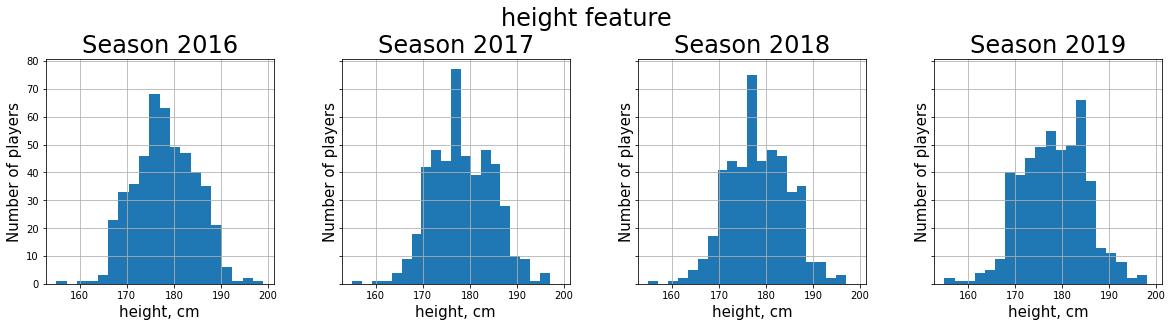

In [17]:
plot_feature_per_season(fname='height', xname='height, cm')

## Supp 3. Data to fastai format

Train-valid splitter

In [18]:
splits = RandomSplitter(valid_pct=0.15,seed=42)(range_of(train_new))

Specify categorical and continuous features

In [19]:
# categorical features
names_cat = ['No', 'position', 'nationality', 'is_youth', 'is_old', 'prev1_div', 'prev2_div', 'prev3_div', 'place_prev_season', 'prev12_div', 'prev123_div']
# continious features
names_cont = ['height', 'weight', 'salary', 'nth_year', 'age', 'j1_total_num_played', 'j1_total_scores', 'j2_total_num_played', 'j2_total_scores', 'j3_total_num_played', 'j3_total_scores',
              'na_total_num_played', 'na_total_scores', 'prev1_num_played', 'prev2_num_played', 'prev3_num_played', 'prev1_scores', 'prev2_scores', 'prev3_scores',
              'prev1_time_played', 'prev2_time_played', 'prev3_time_played', 'j12_total_num_played', 'j1na_total_num_played', 'j12_total_scores', 'j1na_total_scores',
              'prev12_num_played', 'prev123_num_played', 'prev12_scores', 'prev123_scores', 'prev12_time_played', 'prev123_time_played']
# column to predict
names_target = ['time_played']

In [20]:
data_tab = TabularPandas(train_new,
                         cat_names = names_cat,
                         cont_names = names_cont,
                         y_names = names_target,
                         procs=[FillMissing, Categorify, Normalize],
                         splits=splits)
data = data_tab.dataloaders(bs=16)
data.show_batch()

,No,position,nationality,is_youth,is_old,prev1_div,prev2_div,prev3_div,place_prev_season,prev12_div,prev123_div,height,weight,salary,nth_year,age,j1_total_num_played,j1_total_scores,j2_total_num_played,j2_total_scores,j3_total_num_played,j3_total_scores,na_total_num_played,na_total_scores,prev1_num_played,prev2_num_played,prev3_num_played,prev1_scores,prev2_scores,prev3_scores,prev1_time_played,prev2_time_played,prev3_time_played,j12_total_num_played,j1na_total_num_played,j12_total_scores,j1na_total_scores,prev12_num_played,prev123_num_played,prev12_scores,prev123_scores,prev12_time_played,prev123_time_played,time_played
0,6,DF,other,False,False,True,True,True,3,2,3,170.0,70.0,2799.999997,5.0,28.0,158.999998,7.000000e+00,4.700000e+01,9.999999e-01,6.052849e-08,-3.444848e-09,-1.703992e-07,1.373849e-08,1.700000e+01,34.000001,27.0,6.804518e-08,1.000000e+00,4.000000e+00,1346.000000,3060.000040,2195.999996,182.500001,1.590000e+02,3.050000e+01,7.000000e+00,51.000000,78.000000,9.999999e-01,5.000000e+00,4405.999967,6602.000053,770.0
1,7,MF,other,False,False,True,True,True,5,2,3,169.0,67.0,3399.999993,9.0,29.0,218.000004,2.900000e+01,9.715600e-07,2.942738e-08,6.052849e-08,-3.444848e-09,1.000000e+00,1.373849e-08,3.100000e+01,33.000001,28.0,8.000000e+00,4.000000e+00,2.000000e+00,1743.000015,1947.000016,1483.999986,218.000002,2.190000e+02,2.900000e+01,2.900000e+01,64.000000,91.999998,1.200000e+01,1.400000e+01,3690.000021,5174.000006,695.0
2,14,FW,other,False,False,True,True,True,4,2,3,176.0,68.0,2999.999980,3.0,25.0,97.000000,1.700000e+01,9.715600e-07,2.942738e-08,6.052849e-08,-3.444848e-09,3.000000e+00,1.373849e-08,3.400000e+01,33.000001,30.0,6.000000e+00,7.000000e+00,4.000000e+00,2894.999965,2675.999951,1391.999995,97.000000,1.000000e+02,1.700000e+01,1.700000e+01,67.000000,96.999998,1.300000e+01,1.700000e+01,5571.000047,6962.999962,2941.0
3,8,MF,other,False,False,True,True,True,5,2,3,172.0,63.0,2999.999980,8.0,26.0,146.000000,2.700000e+01,9.715600e-07,2.942738e-08,6.052849e-08,-3.444848e-09,2.000000e+00,1.373849e-08,3.300000e+01,30.000000,28.0,3.000000e+00,8.000000e+00,6.000000e+00,2380.000021,2129.999977,2015.000009,146.000000,1.480000e+02,2.700000e+01,2.700000e+01,62.999999,91.000000,1.100000e+01,1.700000e+01,4510.000044,6524.999925,2052.0
4,22,DF,other,False,False,True,True,True,3,2,3,171.0,65.0,1500.000014,4.0,28.0,62.000000,4.000000e+00,1.160000e+02,2.000000e+00,6.052849e-08,-3.444848e-09,-1.703992e-07,1.373849e-08,2.900000e+01,29.000000,4.0,2.000000e+00,2.000000e+00,-5.803443e-09,2294.999978,2470.999965,135.999988,120.000000,6.200000e+01,6.200000e+01,4.000000e+00,58.000000,62.000000,4.000000e+00,4.000000e+00,4766.000121,4901.999980,2137.0
5,5,MF,other,False,False,True,True,True,4,2,3,170.0,64.0,2200.000001,6.0,24.0,75.999999,1.000000e+00,9.715600e-07,2.942738e-08,1.000000e+01,9.999999e-01,-1.703992e-07,1.373849e-08,2.300000e+01,27.000000,24.0,6.804518e-08,1.000000e+00,-5.803443e-09,1852.000002,2232.000032,1880.999997,75.999999,7.600000e+01,1.000000e+00,9.999999e-01,50.000000,74.000000,9.999999e-01,1.000000e+00,4083.999997,5965.000026,1282.0
6,18,MF,other,False,True,True,True,True,2,2,3,175.0,70.0,3500.000032,16.0,36.0,288.999996,4.900000e+01,2.300000e+01,3.000000e+00,2.000000e+00,-3.444848e-09,6.000000e+00,1.373849e-08,2.333863e-07,10.000000,3.0,6.804518e-08,1.000000e+00,-5.803443e-09,0.000046,569.999984,60.999998,300.499996,2.950000e+02,6.050000e+01,4.900000e+01,10.000000,12.999998,9.999999e-01,1.000000e+00,570.000034,631.000052,57.0
7,31,GK,other,False,False,False,False,False,3,0,0,187.0,83.0,450.000080,1.0,24.0,0.000002,4.207686e-08,1.400000e+01,2.942738e-08,1.000000e+00,-3.444848e-09,-1.703992e-07,1.373849e-08,2.000000e+00,5.000000,7.0,6.804518e-08,6.981418e-08,-5.803443e-09,180.000048,449.999973,630.000015,7.000003,1.852604e-07,6.999999e+00,-2.740620e-07,6.999999,14.000001,-1.552870e-07,-1.519652e-07,630.000060,1260.000068,0.0
8,21,FW,other,False,True,True,False,False,4,1,1,187.0,80.0,4500.000041,2.0,32.0,8.000002,4.207686e-08